## NLP with DL

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import libraries

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
import tensorflow as tf
tf. __version__

'2.8.2'

In [ ]:
np.__version__

'1.21.6'

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL/hepsiburada.csv')

In [ ]:
df.head()

,Rating,Review
0,1,3 yıldır tık demedi. :)
1,1,3 yıldır kullanıyorum müthiş
2,1,Ürün bugün elime geçti çok fazla inceleme fırs...
3,1,Almaya karar verdim. Hemencecik geldi. Keyifle...
4,1,Günlük kullanımınızı çok çok iyi karsılıyor kı...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243497 entries, 0 to 243496
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Rating  243497 non-null  int64 
 1   Review  243497 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [ ]:
df.Rating = df.Rating.map({1:0, 0:1})

In [ ]:
df.Rating.value_counts()

0    229821
1     13676
Name: Rating, dtype: int64

In [ ]:
df.Rating.value_counts(normalize=True)

0    0.943835
1    0.056165
Name: Rating, dtype: float64

## Tokenization

In [ ]:
X = df['Review']
y = df['Rating']

In [ ]:
num_words = 15000 # corpusta geçen en fazla kullanılan ilk 15.000 kelimeyi(tokeni) alacağız gerisini yok sayacağız. 
# None değeri atanırsa tüm kelimeler dikkate alınır.
tokenizer = Tokenizer(num_words=num_words)  # filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890' # default olarak sembol ve özel karakterleri siler. sayilari da silsin istersem bu satiri kullan

In [ ]:
tokenizer.fit_on_texts(X)  # token islemini yap

## Creating word index

In [ ]:
tokenizer.word_index  # kullanim sikligina göre siraladi

{'çok': 1,
 'bir': 2,
 've': 3,
 'ürün': 4,
 'bu': 5,
 'iyi': 6,
 'güzel': 7,
 'için': 8,
 'tavsiye': 9,
 'ederim': 10,
 'daha': 11,
 'ama': 12,
 'da': 13,
 'gayet': 14,
 'hızlı': 15,
 'teşekkürler': 16,
 'aldım': 17,
 'de': 18,
 'ürünü': 19,
 'gibi': 20,
 'yok': 21,
 'uygun': 22,
 'olarak': 23,
 'kaliteli': 24,
 'en': 25,
 '2': 26,
 'kargo': 27,
 'fiyat': 28,
 'elime': 29,
 'kadar': 30,
 'ile': 31,
 'göre': 32,
 'geldi': 33,
 'var': 34,
 'hepsiburada': 35,
 'ben': 36,
 'gerçekten': 37,
 '1': 38,
 'fiyata': 39,
 'gün': 40,
 'sonra': 41,
 'cok': 42,
 'kesinlikle': 43,
 'telefon': 44,
 'biraz': 45,
 'hiç': 46,
 'ulaştı': 47,
 'memnun': 48,
 'hem': 49,
 'değil': 50,
 'kullanışlı': 51,
 '3': 52,
 'mükemmel': 53,
 'oldu': 54,
 'kullanıyorum': 55,
 'önce': 56,
 'sipariş': 57,
 'tek': 58,
 'her': 59,
 'bence': 60,
 'harika': 61,
 'kalitesi': 62,
 'bi': 63,
 'ayrıca': 64,
 '5': 65,
 'teşekkür': 66,
 'fiyatı': 67,
 'olması': 68,
 'ne': 69,
 'herkese': 70,
 'bile': 71,
 'uzun': 72,
 'süper': 73,

In [ ]:
len(tokenizer.word_index)

217983

## Converting tokens to numeric

In [ ]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [ ]:
X[105]  # "cok" en fazla kullanilan kelime yani 1 numara | 6. kelime olmasina ragmen 1 rakami 5. sirada. demek ki cümledeki ilk 5 kelime en cok kullanilan 15.000 kelime arasinda degilmis

'Logitech ürünlerinin geneli kalite olarak çok iyidir. Adedini tam saymadım ama 10 un üzerinde kendime akrabalarıma arkadaşlarıma almışımdır hepside memnunlar. İhtiyacı olan kaçırmasın başkada ürün aramasın derim.'

In [ ]:
print(X_num_tokens[105])

[1816, 5360, 131, 23, 1, 1849, 74, 12, 118, 1533, 297, 745, 3216, 13402, 6326, 5030, 2463, 113, 2534, 8858, 4, 143]


## Maximum number of tokens for all documents

In [ ]:
len(X_num_tokens[105])

22

In [ ]:
len(X_num_tokens[106])

18

In [ ]:
len(X_num_tokens[6150])

88

In [ ]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [ ]:
num_tokens

array([ 4,  4, 66, ...,  4, 10, 38])

In [ ]:
num_tokens.mean()

21.36101060793357

In [ ]:
num_tokens.max()

298

In [ ]:
num_tokens.argmax() # listedeki en uzun yorumun indexini argmax ile bulabiliyoruz.

21941

In [ ]:
X[21941]

'Özellikle bu kısma yazıyorum iyice okuyunuz,cihazın hızı çok iyi.Isınma normal boyutlarda.Kamerası elinizi sabit tutarsanız ve gündüz çok net gece ise çok net çekmez.Görüntülü konuşma özelliği yok ancak uygulama ile olur,anten çekimi gayet iyi.Parmak izi okuyucusu gayet hızlı bazen tuşu silmenizi istiyor ve okuyamıyor kirden vs...Ön kamera da tatmin edici,çekim esnasında ekran beyaz ışık vererek flaş görevi görür.Batarya bana 1 hafta gidiyor sık kullanımda ise 2-3 gün gidiyor.Hızlı şarj 1 saatte doluyor , şekilleri ele oturuyor ve şık bir görüntü var.Telefonu aldığım gün gittim ve ilk girdiğim yerden ekran koruyucu ve kılıf buldum.Kulaklık sesi çok net ve yüksek ancak kendi hoparlörü biraz zayıf sesi.Ekrana bakarken açık kalma özelliği yok.Diğer akıllı cihaz özellikleri %90 ı bu cihazda mevcut.Güç tasarrufu 2 ayrı modu var ve çok başarılı çalışıyor.4gb ram var genelde yarısı boş kalıyor.Bir de yeni cihazların çoğu titreşimi az ve sesi de az çıkıyor.Bu cihaz da içine dahil...Bu cihazla

In [ ]:
len(X_num_tokens[21941])

298

In [ ]:
list = [5, 10, 8, 9, 12, 15]
print(np.array(list) < 11)
print(sum(np.array(list) < 11))
print(sum(np.array(list) < 11)/len(list))

[ True  True  True  True False False]
4
0.6666666666666666


In [ ]:
max_tokens = 61

In [ ]:
sum(num_tokens < max_tokens) / len(num_tokens)

0.9598968365113328

In [ ]:
sum(num_tokens < max_tokens)

233732

In [ ]:
len(num_tokens)

243497

## Fixing token counts of all documents (pad_sequences)

In [ ]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [ ]:
X_pad.shape

(243497, 61)

In [ ]:
np.array(X_num_tokens[800])

array([  19,  341,   52,  194,   30,   54, 7992,   55,  209,  603, 7887,
          3,   36,  114,  164,  479,   85,    1, 1682,  782,   30,    2,
        380,  326,    3,    1,   81,  132,  562,    9,   10])

In [ ]:
len(np.array(X_num_tokens[800]))

31

In [ ]:
X_pad[800]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,   19,  341,   52,
        194,   30,   54, 7992,   55,  209,  603, 7887,    3,   36,  114,
        164,  479,   85,    1, 1682,  782,   30,    2,  380,  326,    3,
          1,   81,  132,  562,    9,   10], dtype=int32)

In [ ]:
np.array(X_num_tokens[21941])

array([  145,     5,  5876,  2225,  1653,   902,   203,     1,     6,
        2958,   163,  4248,   374,  3449,  1521, 12582,     3,  1381,
           1,   491,   281,   140,     1,   491,  3391,  2388,   235,
          21,    82,   756,    31,   212,  4458,  1448,    14,     6,
         472,   609,  2159,    14,    15,   673,  1681,  2152,     3,
         313,   444,   261,    13,   561,   463,   470,  1664,   168,
         639,   519,  3209,  5455,  6409,   600,   625,   153,    38,
         194,   272,   635,   389,   140,    26,    52,    40,   272,
          15,    84,    38,   466,  1679, 12350,  1036,   999,     3,
          96,     2,   318,    34,   134,   169,    40,  2752,     3,
          77,   750,   168,   881,     3,   509,   571,   359,   195,
           1,   491,     3,   172,    82,   256,  6460,    45,   926,
         195,  2061,  6575,   603,  7031,   235,    21,   103,   931,
         136,   394,  1316,  1917,     5,  2167,   567,  1034,  2217,
          26,   335,

In [ ]:
X_pad[21941]

array([ 872, 3501,  537, 1804,  488, 2218,   75,  163,    2,  456,   13,
       1308, 1865, 3432,    5,  824, 7798,  836, 1640, 7838, 3344,   12,
       1308,   31, 3063,  299, 2704,  851, 1052,   39, 1490, 3436,  317,
       1170,   75,  537,   50,  327,  246, 1322,  120,    2, 3436, 7527,
        199,  260,  579, 6176, 1800,   13,   45,  808,  108,    3,  865,
        749, 5840,   50,  106,   76,  879], dtype=int32)

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, stratify=y, random_state=0)

## Modelling

In [ ]:
model = Sequential()  # Sequential ile temeli atiyorum

In [ ]:
embedding_size = 50

In [ ]:
# pip install -U numpy==1.19.5

In [ ]:
model.add(Embedding(input_dim=num_words,  # Embedding dönüsümü yapiyor
                    output_dim=embedding_size,
                    input_length=max_tokens))

model.add(Dropout(0.2))

model.add(GRU(units=48, return_sequences=True))
model.add(Dropout(0.2))

#model.add(GRU(units=24, return_sequences=True))
#model.add(Dropout(0.2))

model.add(GRU(units=12))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
optimizer = Adam(learning_rate=0.01)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

https://stats.stackexchange.com/questions/328926/how-many-parameters-are-in-a-gated-recurrent-unit-gru-recurrent-neural-network

In [ ]:
model.summary() 
# 3 x (n2 + nm + 2n) m= input, n= output
# (48*48 + 50*48 + 2*48)*3 ==> m = 50, n = 48
# (24*24 + 48*24 + 2*24)*3 ==> m = 48, n = 24
# (12*12 + 24*12 + 2*12)*3 ==> m = 24, n = 12

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 61, 50)            750000    
                                                                 
 dropout (Dropout)           (None, 61, 50)            0         
                                                                 
 gru (GRU)                   (None, 61, 48)            14400     
                                                                 
 dropout_1 (Dropout)         (None, 61, 48)            0         
                                                                 
 gru_1 (GRU)                 (None, 12)                2232      
                                                                 
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 766,645
Trainable params: 766,645
Non-trai

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max", 
                           verbose=1, patience = 1, restore_best_weights=True)

In [ ]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([0.52975426, 8.90215702])

https://keras.io/getting_started/faq/#why-is-my-training-loss-much-higher-than-my-testing-loss

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=256, sample_weight= classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
761/761 [==============================] - 18s 12ms/step - loss: 0.3146 - recall: 0.8571 - val_loss: 0.2112 - val_recall: 0.8516
Epoch 2/10
761/761 [==============================] - 8s 11ms/step - loss: 0.1985 - recall: 0.9254 - val_loss: 0.1753 - val_recall: 0.8121
Epoch 2: early stopping


## Model evaluation

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.314585,0.857143,0.211240,0.851554
1,0.198533,0.925418,0.175267,0.812066


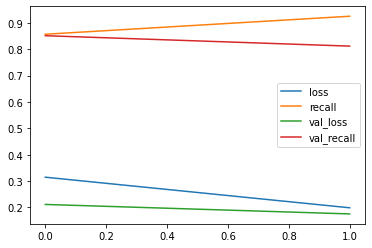

In [ ]:
model_loss.plot()

In [ ]:
model.evaluate(X_train, y_train)

6088/6088 [==============================] - 28s 5ms/step - loss: 0.1888 - recall: 0.9328


[0.18881674110889435, 0.93282151222229]

In [ ]:
model.evaluate(X_test, y_test)

1522/1522 [==============================] - 7s 5ms/step - loss: 0.2112 - recall: 0.8516


[0.21123988926410675, 0.8515539169311523]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score


y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

[[170760  13096]
 [   735  10206]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    183856
           1       0.44      0.93      0.60     10941

    accuracy                           0.93    194797
   macro avg       0.72      0.93      0.78    194797
weighted avg       0.96      0.93      0.94    194797



In [ ]:
y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

[[42348  3617]
 [  406  2329]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     45965
           1       0.39      0.85      0.54      2735

    accuracy                           0.92     48700
   macro avg       0.69      0.89      0.75     48700
weighted avg       0.96      0.92      0.93     48700



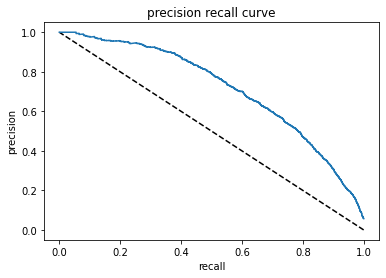

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba,)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve')
plt.show()

In [ ]:
average_precision_score(y_test, y_pred_proba)

0.7150892277996372

## Scores without sample_weight

Test set

                precision    recall  f1-score   support

           0       0.98      0.99      0.98     45965
           1       0.72      0.63      0.67      2735

    accuracy                           0.97     48700
   macro avg       0.85      0.81      0.83     48700
weighted avg       0.96      0.97      0.96     48700
 
 
 
 
 Train set             
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    183856
           1       0.87      0.80      0.84     10941

    accuracy                           0.98    194797
   macro avg       0.93      0.90      0.91    194797
weighted avg       0.98      0.98      0.98    194797

In [ ]:
Test set

                precision    recall  f1-score   support

           0       0.98      0.99      0.98     45965
           1       0.72      0.63      0.67      2735

    accuracy                           0.97     48700
   macro avg       0.85      0.81      0.83     48700
weighted avg       0.96      0.97      0.96     48700
 
 
 
 
 Train set             
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    183856
           1       0.87      0.80      0.84     10941

    accuracy                           0.98    194797
   macro avg       0.93      0.90      0.91    194797
weighted avg       0.98      0.98      0.98    194797

IndentationError: ignored

## Model Saving

In [ ]:
model.save('review_hepsiburada.h5')

##Loading Model

In [ ]:
from tensorflow.keras.models import load_model
model_review = load_model('/content/drive/MyDrive/review_hepsiburada.h5')

## Predicton

In [ ]:
review1 = "çok beğendim herkese tavsiye ederim"
review2 = "süper ürün"
review3 = "büyük bir hayal kırıklığı yaşadım bu ürünü bu markaya yakıştıramadım"
review4 = "kelimelerle tarif edilemez"
review5 = "tasarımı harika ancak kargo çok geç geldi ve ürün açılmıştı hayal kırıklığı gerçekten"
review6 = "hiç resimde gösterildiği gibi değil"
review7 = "kötü yorumlar gözümü korkutmuştu ancak hiçbir sorun yaşamadım."
review8 = "hiç bu kadar kötü bir satıcıya denk gelmemiştim ürün siparişimi iptal ediyorum"
review9 = "tam bir fiyat performans ürünü"
review10 = "beklediğim gibi çıkmadı"
review11 = "on numara beş yıldız"
review12 = "üründe sıkıntı var"
review13 = "televizyonun görüntü kalitesi çok kötü, dün akşam evde arkadaşlarla toplandık. yedik, içtik, sohbet ettik. Sonra televizyonda Türkiye - İngiltere maçını seyrettik. "
review14 = '1 gün gibi kısa bir sürede elime geçti. Ve bu fıyata süper bir ürün tavsiye ederim. Lakin eli büyük olan kişiler daha büyük modelini tercih edebilirler ortaboy ürün. Teşekkürler '
reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10, review11, review12, review13, review14]

In [ ]:
tokens = tokenizer.texts_to_sequences(reviews)

In [ ]:
tokens

In [ ]:
tokens_pad = pad_sequences(tokens, maxlen=max_tokens)
tokens_pad.shape

In [ ]:
prob = model_review.predict(tokens_pad)
prob

In [ ]:
pred = (model_review.predict(tokens_pad) >0.5).astype("int")
pred

In [ ]:
pd.set_option('display.max_colwidth', None)
my_dict = {"Review":reviews, "prob":[i[0] for i in prob], "classes":[i[0] for i in pred]}
pd.DataFrame(my_dict)